In [1]:
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
%%capture
folder_path = '/Proyecto limpieza de datos/'
file_list = glob.glob("*.csv")
main_dataframe = pd.DataFrame(pd.read_csv(file_list[0], sep=';'))
for i in range(1,len(file_list)):
    data = pd.read_csv(file_list[i], sep=';')
    df = pd.DataFrame(data)
    main_dataframe = pd.concat([main_dataframe, df], axis = 0)
print(main_dataframe)

In [3]:
main_dataframe.head()

,Issue Key,Issue summary,Hours,Work date,Username,Period,Account Key,Account Name,Account Lead,Account Category,...,Reporter,External Hours,Billed Hours,Issue Original Estimate,Issue Remaining Estimate,Customer Reference,Project-Nr. (billable),Issue Ttus,Project Name,Full name
0,ENEXSC-612,Meeting Gemalto,4.0,30/01/2019,sebastian,NaN,NaN,NaN,NaN,NaN,...,sebastian,0.0,4.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,ENEXSC-612,Meeting Gemalto,8.0,31/01/2019,sebastian,NaN,NaN,NaN,NaN,NaN,...,sebastian,0.0,8.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,VARIOUS-253,Meetings,1.0,28/01/2019,sebastian,NaN,NaN,NaN,NaN,NaN,...,sebastian,0.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,JUSTIT-864,Implement Workflow Admin,6.0,30/01/2019,sebastian,NaN,NaN,NaN,NaN,NaN,...,sebastian,0.0,6.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,JUSTIT-864,Implement Workflow Admin,8.0,29/01/2019,sebastian,NaN,NaN,NaN,NaN,NaN,...,sebastian,0.0,8.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [4]:
print(main_dataframe.shape)
print(main_dataframe.dtypes)

(81571, 32)
Issue Key                    object
Issue summary                object
Hours                       float64
Work date                    object
Username                     object
Period                      float64
Account Key                 float64
Account Name                float64
Account Lead                float64
Account Category            float64
Account Customer            float64
Activity Name                object
Component                    object
All Components               object
Version Name                 object
Issue Type                   object
Issue Status                 object
Project Key                  object
Epic                         object
Epic Link                    object
Work Description             object
Parent Key                   object
Reporter                     object
External Hours              float64
Billed Hours                float64
Issue Original Estimate     float64
Issue Remaining Estimate    float64
Customer Referen

Transformación del formato de la variable fecha

In [5]:
%%capture
main_dataframe['Work date'] = pd.to_datetime(main_dataframe['Work date']) 

Ordenar el dataframe por fecha

In [6]:
df1=main_dataframe.sort_values(by='Work date')

In [7]:
print(df1)

        Issue Key                                      Issue summary  Hours  \
667     POAG-2572   Übernahmw Kontrollschild, Fz und Halter aus Home   0.50   
724    JUSTIT-984  BACKOFFICE-IT make all the unit tests pass in ...   2.00   
735    VATRO-1650      Split between clientProduct and XplainProduct   8.00   
714   VARIOUS-474  Maintenance, packages and tool upgrades, POCs ...   4.00   
715     TPOBO-311           App loads old data / show old train data   4.00   
...           ...                                                ...    ...   
2338    No access                                                NaN  64.00   
2314    No access                                                NaN  47.75   
2451    No access                                                NaN  48.25   
2200    No access                                                NaN   2.00   
1817    No access                                                NaN   1.00   

      Work date   Username  Period  Account Key  Ac

Hay varias columnas o variables que simplemente a lo largo de los documentos han cambiado de nombre, por lo que es importante localizarlas y agruparlas en una sola variable.

Tras hacer un análisis de las variables, 26 se repiten en todos los documentos. Hay una vigesimoséptima, Issue Status, que en algunos documentos se llama Issue Ttus. Se agrupará en una única variable.

Por otra parte, Customer reference, link de Jira, no nos sirve para el análisis de los datos, por lo que se va a eliminar.

Project_Nr. (billable) -> es un código que no nos aporta información, por lo que se descarta.

Project Name -> variable muy parecida a project key, además va a tener muchísimos missing values, por lo que se puede borrar por dos razones distintas.

Full name -> nombre y apellidos de los usuarios. Algún mes había dos Jose Manuel distintos, sin embargo, username ya distingue a los usuarios (josem y josema), por lo que no necesitamos esta columna (nos importa saber que hay usuarios distintos, pero no su identidad para este trabajo).

In [8]:
df1 = df1.drop(['Customer Reference', 'Project-Nr. (billable)', 'Project Name', 'Full name'], axis = 1)

Ahora los valores de Issue Ttus se trasladarán a la columna Issue Status. Después se borra la columna Issue Ttus, quedando todos los valores agrupados en la columna Issue Status.

In [9]:
df1['Issue Status'] = df1['Issue Status'].fillna(df1['Issue Ttus'])

In [10]:
df2 = df1.drop(['Issue Ttus'], axis = 1)

Revisión de las variables que quedan aún en el archivo de datos

In [11]:
print(df2.shape)
print(df2.dtypes)

(81571, 27)
Issue Key                           object
Issue summary                       object
Hours                              float64
Work date                   datetime64[ns]
Username                            object
Period                             float64
Account Key                        float64
Account Name                       float64
Account Lead                       float64
Account Category                   float64
Account Customer                   float64
Activity Name                       object
Component                           object
All Components                      object
Version Name                        object
Issue Type                          object
Issue Status                        object
Project Key                         object
Epic                                object
Epic Link                           object
Work Description                    object
Parent Key                          object
Reporter                            object

Como parte del proceso KDD que wses pretende utilizar para transformar los datos en valor (pasando previamente por información), Se va a comprobar los missing values que se encuentran entre los datos.

Para hacerlo de forma visual, se propone el siguiente mapa de calor:

<AxesSubplot:>

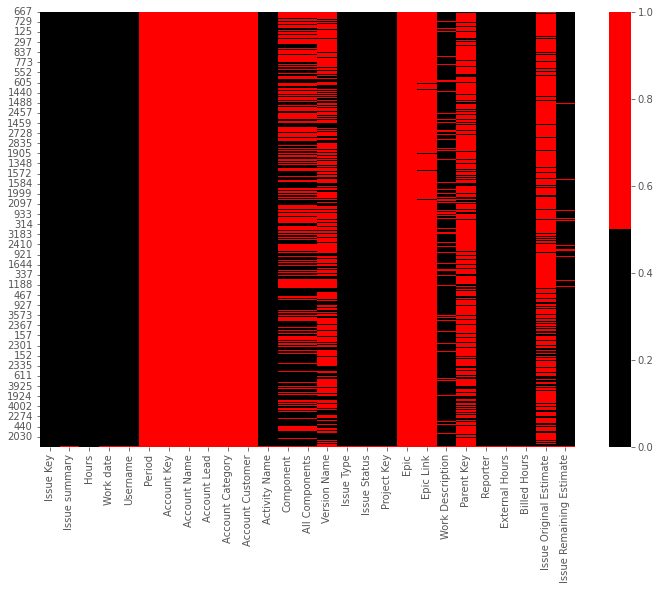

In [12]:
cols = df2.columns[:27]
colours = ['k', 'r'] # rojo son los missing values, mientras que en negro se representa el resto de valores
sns.heatmap(df2[cols].isnull(), cmap=sns.color_palette(colours))

Dado el elevado número de variables repletas de missing values, es conveniente visualizar estos datos de la siguiente forma:

In [13]:
for col in df2.columns:
    pct_missing = np.mean(df2[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Issue Key - 0%
Issue summary - 0%
Hours - 0%
Work date - 0%
Username - 0%
Period - 100%
Account Key - 100%
Account Name - 100%
Account Lead - 100%
Account Category - 100%
Account Customer - 100%
Activity Name - 0%
Component - 45%
All Components - 45%
Version Name - 65%
Issue Type - 0%
Issue Status - 0%
Project Key - 0%
Epic - 100%
Epic Link - 99%
Work Description - 10%
Parent Key - 78%
Reporter - 0%
External Hours - 0%
Billed Hours - 0%
Issue Original Estimate - 80%
Issue Remaining Estimate - 2%


De entrada, se va a desestimar aquellas variables con un porcentaje de missing values superior al 50%, después, se evaluarán una a una las variables con missing values.

In [14]:
df2 = df2.drop(['Period', 'Account Key', 'Account Name', 'Account Lead', 
                'Account Category', 'Account Customer', 'Epic', 'Epic Link', 'Issue Original Estimate'], axis = 1)

In [15]:
df2.head()

,Issue Key,Issue summary,Hours,Work date,Username,Activity Name,Component,All Components,Version Name,Issue Type,Issue Status,Project Key,Work Description,Parent Key,Reporter,External Hours,Billed Hours,Issue Remaining Estimate
667,POAG-2572,"Übernahmw Kontrollschild, Fz und Halter aus Home",0.5,2019-01-01,sebastian,Formular+,Formular+,Formular+,NaN,Bug,Closed,POAG,added comments,NaN,valentin,0.0,0.5,0.0
724,JUSTIT-984,BACKOFFICE-IT make all the unit tests pass in ...,2.0,2019-01-02,roberto,JustThis IT,NaN,NaN,NaN,New Feature,Closed,JUSTIT,Make all the unit test pass in green in the ID...,NaN,roberto,0.0,2.0,0.0
735,VATRO-1650,Split between clientProduct and XplainProduct,8.0,2019-01-02,pilar,Lucene,NaN,NaN,Lucene,New Feature,Closed,VATRO,Implementation,NaN,pilar,0.0,8.0,0.0
714,VARIOUS-474,"Maintenance, packages and tool upgrades, POCs ...",4.0,2019-01-02,teo,VARIOUS,NaN,NaN,NaN,Task,In Progress,VARIOUS,,NaN,Mario,0.0,4.0,0.0
715,TPOBO-311,App loads old data / show old train data,4.0,2019-01-02,teo,module-ox-5,module-ox-5,module-ox-5,NaN,Bug,Closed,TPOBO,,NaN,robert,0.0,4.0,0.0


In [16]:
#df2.to_csv('datoscargadosprueba2.csv', sep=';')

In [17]:
for col in df2.columns:
    pct_missing = np.mean(df2[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Issue Key - 0%
Issue summary - 0%
Hours - 0%
Work date - 0%
Username - 0%
Activity Name - 0%
Component - 45%
All Components - 45%
Version Name - 65%
Issue Type - 0%
Issue Status - 0%
Project Key - 0%
Work Description - 10%
Parent Key - 78%
Reporter - 0%
External Hours - 0%
Billed Hours - 0%
Issue Remaining Estimate - 2%


Tras obtener el archivo csv resultante, se hace una breve observación de las categorías que permanecen en el dataset.
Component y All components son bastante similares y no aportan demasiada información de acuerdo con el objetivo que se persigue, además de tener una gran cantidad de missing values. Además, los valores que no son missing values en estas variables, coinciden con los valores de Activity Name.
Version Name, que contiene también demasiados missing values, se va a quitar del dataset.
Parent Key, de la misma forma, posee demasiados missing values. Si bien los missing values significan que la actividad en cuestión no deriva de otra, podría transformarse en una variable Booleana, que indique si la actividad posee parent key o no. 
External Hours ha resultado tener el mismo valor para toda la variable, por lo que no aporta información.

In [18]:
df2 = df2.drop(['Component', 'All Components', 'Version Name', 'External Hours'], axis = 1)

In [19]:
for col in df2.columns:
    pct_missing = np.mean(df2[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Issue Key - 0%
Issue summary - 0%
Hours - 0%
Work date - 0%
Username - 0%
Activity Name - 0%
Issue Type - 0%
Issue Status - 0%
Project Key - 0%
Work Description - 10%
Parent Key - 78%
Reporter - 0%
Billed Hours - 0%
Issue Remaining Estimate - 2%


In [20]:
df2['Parent Key'] = df2['Parent Key'].fillna(0)

In [21]:
df2.loc[df2['Parent Key'] != 0, 'Parent Key'] = 1

In [22]:
print(df2['Parent Key'])

667     0
724     0
735     0
714     0
715     0
       ..
2338    0
2314    0
2451    0
2200    0
1817    0
Name: Parent Key, Length: 81571, dtype: object


In [23]:
df2['Parent Key'] = df2['Parent Key'].astype('bool')

In [24]:
#df2.to_csv('datoscargadosprueba2.csv', sep=';')

In [25]:
for col in df2.columns:
    pct_missing = np.mean(df2[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Issue Key - 0%
Issue summary - 0%
Hours - 0%
Work date - 0%
Username - 0%
Activity Name - 0%
Issue Type - 0%
Issue Status - 0%
Project Key - 0%
Work Description - 10%
Parent Key - 0%
Reporter - 0%
Billed Hours - 0%
Issue Remaining Estimate - 2%


In [26]:
print(df2.shape)
print(df2.dtypes)

(81571, 14)
Issue Key                           object
Issue summary                       object
Hours                              float64
Work date                   datetime64[ns]
Username                            object
Activity Name                       object
Issue Type                          object
Issue Status                        object
Project Key                         object
Work Description                    object
Parent Key                            bool
Reporter                            object
Billed Hours                       float64
Issue Remaining Estimate           float64
dtype: object


Voy a comprobar si hay alguna otra variable que posea un gran número de filas con el mismo valor, concretamente el 95% o más de filas con el mismo valor:

In [27]:
num_rows = len(df2.index)
low_information_cols = [] #

for col in df2.columns:
    cnts = df2[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()
    else:
        print('Los valores de esta variable no coinciden en un 95%')

Los valores de esta variable no coinciden en un 95%
Los valores de esta variable no coinciden en un 95%
Los valores de esta variable no coinciden en un 95%
Los valores de esta variable no coinciden en un 95%
Los valores de esta variable no coinciden en un 95%
Los valores de esta variable no coinciden en un 95%
Los valores de esta variable no coinciden en un 95%
Los valores de esta variable no coinciden en un 95%
Los valores de esta variable no coinciden en un 95%
Los valores de esta variable no coinciden en un 95%
Los valores de esta variable no coinciden en un 95%
Los valores de esta variable no coinciden en un 95%
Los valores de esta variable no coinciden en un 95%
Los valores de esta variable no coinciden en un 95%


## Añadir el coste/hora ##

Se divide la variable fecha en 3 variables que especifiquen día, mes y año

In [28]:
df2['AÑO'] = df2['Work date'].dt.year
df2['MES'] = df2['Work date'].dt.month
df2['DIA'] = df2['Work date'].dt.day

Además, es posible añadir más valor aún al dataset gracias a un pequeño dataset externo que indica el coste/hora que asume la empresa por cada trabajador, generando una nueva variable:

In [29]:
df2.loc[df2['Username'] == 'emmanuel', 'Coste por hora'] = 50
df2.loc[df2['Username'] == 'domingo', 'Coste por hora'] = 50
df2.loc[df2['Username'] == 'roman', 'Coste por hora'] = 50*3
df2.loc[df2['Username'] == 'ramon', 'Coste por hora'] = 50
df2.loc[df2['Username'] == 'christian.fricker', 'Coste por hora'] = 50*1.5
df2.loc[df2['Username'] == 'lea', 'Coste por hora'] = 50*2
df2.loc[df2['Username'] == 'Project', 'Coste por hora'] = 50*3
df2.loc[df2['Username'] == 'rocio', 'Coste por hora'] = 50*0.7
df2.loc[df2['Username'] == 'Josema', 'Coste por hora'] = 50
df2.loc[df2['Username'] == 'tim', 'Coste por hora'] = 50*2
df2.loc[df2['Username'] == 'isabel', 'Coste por hora'] = 50*1.5
df2.loc[df2['Username'] == 'teo', 'Coste por hora'] = 50*1.25
df2.loc[df2['Username'] == 'marcel', 'Coste por hora'] = 50*3
df2.loc[df2['Username'] == 'stefan', 'Coste por hora'] = 50*3
df2.loc[df2['Username'] == 'oscar', 'Coste por hora'] = 50*1.25
df2.loc[df2['Username'] == 'sergiol', 'Coste por hora'] = 50*1.5
df2.loc[df2['Username'] == 'juerg', 'Coste por hora'] = 50*3
df2.loc[df2['Username'] == 'beatriz', 'Coste por hora'] = 50*1.5
df2.loc[df2['Username'] == 'test', 'Coste por hora'] = 50*0.5
df2.loc[df2['Username'] == 'juanb', 'Coste por hora'] = 50
df2.loc[df2['Username'] == 'roberto', 'Coste por hora'] = 50*1.5
df2.loc[df2['Username'] == 'Mario', 'Coste por hora'] = 50*1.25
df2.loc[df2['Username'] == 'sebastian', 'Coste por hora'] = 50*1.75
df2.loc[df2['Username'] == 'marcus', 'Coste por hora'] = 50*1.75
df2.loc[df2['Username'] == 'loewi', 'Coste por hora'] = 50*5
df2.loc[df2['Username'] == 'raul', 'Coste por hora'] = 50*1.5
df2.loc[df2['Username'] == 'jesus', 'Coste por hora'] = 50*0.5
df2.loc[df2['Username'] == 'matteo', 'Coste por hora'] = 50*3
df2.loc[df2['Username'] == 'ignacio', 'Coste por hora'] = 50*1.25
df2.loc[df2['Username'] == 'Pedros', 'Coste por hora'] = 50*0.7
df2.loc[df2['Username'] == 'server', 'Coste por hora'] = 50*1.25
df2.loc[df2['Username'] == 'angela', 'Coste por hora'] = 50*1.25
df2.loc[df2['Username'] == 'lorenzo', 'Coste por hora'] = 50
df2.loc[df2['Username'] == 'manuel', 'Coste por hora'] = 50*1.25
df2.loc[df2['Username'] == 'miguel', 'Coste por hora'] = 50
df2.loc[df2['Username'] == 'gregorio', 'Coste por hora'] = 50*1.5
df2.loc[df2['Username'] == 'app', 'Coste por hora'] = 50
df2.loc[df2['Username'] == 'tom', 'Coste por hora'] = 50*2
df2.loc[df2['Username'] == 'andreas', 'Coste por hora'] = 50*3
df2.loc[df2['Username'] == 'client', 'Coste por hora'] = 50*1.25
df2.loc[df2['Username'] == 'david', 'Coste por hora'] = 50*1.25
df2.loc[df2['Username'] == 'pilar', 'Coste por hora'] = 50*1.25
df2.loc[df2['Username'] == 'dani.fricker', 'Coste por hora'] = 50*1.25
df2.loc[df2['Username'] == 'alberto', 'Coste por hora'] = 50*1.25
df2.loc[df2['Username'] == 'maira', 'Coste por hora'] = 50*0.5
df2.loc[df2['Username'] == 'sergio', 'Coste por hora'] = 50*1.25
df2.loc[df2['Username'] == 'marcial', 'Coste por hora'] = 50*1.25
df2.loc[df2['Username'] == 'linda', 'Coste por hora'] = 50*2
df2.loc[df2['Username'] == 'stella', 'Coste por hora'] = 50*2
df2.loc[df2['Username'] == 'simon', 'Coste por hora'] = 50*2
df2.loc[df2['Username'] == 'kaniye', 'Coste por hora'] = 50*2
df2.loc[df2['Username'] == 'alvaro', 'Coste por hora'] = 50
df2.loc[df2['Username'] == 'josel', 'Coste por hora'] = 50
df2.loc[df2['Username'] == 'josem', 'Coste por hora'] = 50*1.25

In [30]:
print(df2.shape)
print(df2.dtypes)

(81571, 18)
Issue Key                           object
Issue summary                       object
Hours                              float64
Work date                   datetime64[ns]
Username                            object
Activity Name                       object
Issue Type                          object
Issue Status                        object
Project Key                         object
Work Description                    object
Parent Key                            bool
Reporter                            object
Billed Hours                       float64
Issue Remaining Estimate           float64
AÑO                                float64
MES                                float64
DIA                                float64
Coste por hora                     float64
dtype: object


#### Comprobar de nuevo missing values ####

In [31]:
for col in df2.columns:
    pct_missing = np.mean(df2[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Issue Key - 0%
Issue summary - 0%
Hours - 0%
Work date - 0%
Username - 0%
Activity Name - 0%
Issue Type - 0%
Issue Status - 0%
Project Key - 0%
Work Description - 10%
Parent Key - 0%
Reporter - 0%
Billed Hours - 0%
Issue Remaining Estimate - 2%
AÑO - 0%
MES - 0%
DIA - 0%
Coste por hora - 6%


Ahora, tras comprobar la existencia de algunos missing values correspondientes a cuando la categoría Issue key obtiene el valor "no access" (comprobado tra exportar a fichero csv), se procede a eliminar dichas instancias, ya que carecen de datos clasificables de forma temporal o en proyectos.

In [32]:
df2.drop(df2[(df2['Issue Key'] == 'No access')].index, inplace = True)

Ahora, tras asegurarme de que los datos se han ordenado por fecha, voy a crear un nuevo ID que vaya también relacionado con el orden escogido de fecha. De esta forma, será más fácil identificar las tareas realizadas según su ID en función del momento en que fueron realizadas.

In [33]:
df2.head()

,Issue Key,Issue summary,Hours,Work date,Username,Activity Name,Issue Type,Issue Status,Project Key,Work Description,Parent Key,Reporter,Billed Hours,Issue Remaining Estimate,AÑO,MES,DIA,Coste por hora
667,POAG-2572,"Übernahmw Kontrollschild, Fz und Halter aus Home",0.5,2019-01-01,sebastian,Formular+,Bug,Closed,POAG,added comments,False,valentin,0.5,0.0,2019.0,1.0,1.0,87.5
724,JUSTIT-984,BACKOFFICE-IT make all the unit tests pass in ...,2.0,2019-01-02,roberto,JustThis IT,New Feature,Closed,JUSTIT,Make all the unit test pass in green in the ID...,False,roberto,2.0,0.0,2019.0,1.0,2.0,75.0
735,VATRO-1650,Split between clientProduct and XplainProduct,8.0,2019-01-02,pilar,Lucene,New Feature,Closed,VATRO,Implementation,False,pilar,8.0,0.0,2019.0,1.0,2.0,62.5
714,VARIOUS-474,"Maintenance, packages and tool upgrades, POCs ...",4.0,2019-01-02,teo,VARIOUS,Task,In Progress,VARIOUS,,False,Mario,4.0,0.0,2019.0,1.0,2.0,62.5
715,TPOBO-311,App loads old data / show old train data,4.0,2019-01-02,teo,module-ox-5,Bug,Closed,TPOBO,,False,robert,4.0,0.0,2019.0,1.0,2.0,62.5


In [34]:
df2['ID definitiva'] = np.arange(1, len(df2)+1)

In [35]:
df2.head()

,Issue Key,Issue summary,Hours,Work date,Username,Activity Name,Issue Type,Issue Status,Project Key,Work Description,Parent Key,Reporter,Billed Hours,Issue Remaining Estimate,AÑO,MES,DIA,Coste por hora,ID definitiva
667,POAG-2572,"Übernahmw Kontrollschild, Fz und Halter aus Home",0.5,2019-01-01,sebastian,Formular+,Bug,Closed,POAG,added comments,False,valentin,0.5,0.0,2019.0,1.0,1.0,87.5,1
724,JUSTIT-984,BACKOFFICE-IT make all the unit tests pass in ...,2.0,2019-01-02,roberto,JustThis IT,New Feature,Closed,JUSTIT,Make all the unit test pass in green in the ID...,False,roberto,2.0,0.0,2019.0,1.0,2.0,75.0,2
735,VATRO-1650,Split between clientProduct and XplainProduct,8.0,2019-01-02,pilar,Lucene,New Feature,Closed,VATRO,Implementation,False,pilar,8.0,0.0,2019.0,1.0,2.0,62.5,3
714,VARIOUS-474,"Maintenance, packages and tool upgrades, POCs ...",4.0,2019-01-02,teo,VARIOUS,Task,In Progress,VARIOUS,,False,Mario,4.0,0.0,2019.0,1.0,2.0,62.5,4
715,TPOBO-311,App loads old data / show old train data,4.0,2019-01-02,teo,module-ox-5,Bug,Closed,TPOBO,,False,robert,4.0,0.0,2019.0,1.0,2.0,62.5,5


## FALTA EL COSTE POR HORA DE ALGUNOS EMPLEADOS ##

In [36]:
for col in df2.columns:
    pct_missing = np.mean(df2[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Issue Key - 0%
Issue summary - 0%
Hours - 0%
Work date - 0%
Username - 0%
Activity Name - 0%
Issue Type - 0%
Issue Status - 0%
Project Key - 0%
Work Description - 10%
Parent Key - 0%
Reporter - 0%
Billed Hours - 0%
Issue Remaining Estimate - 2%
AÑO - 0%
MES - 0%
DIA - 0%
Coste por hora - 6%
ID definitiva - 0%


In [37]:
mediacoste = 80
df2['Coste por hora'] = df2['Coste por hora'].fillna(mediacoste)

In [38]:
for col in df2.columns:
    pct_missing = np.mean(df2[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Issue Key - 0%
Issue summary - 0%
Hours - 0%
Work date - 0%
Username - 0%
Activity Name - 0%
Issue Type - 0%
Issue Status - 0%
Project Key - 0%
Work Description - 10%
Parent Key - 0%
Reporter - 0%
Billed Hours - 0%
Issue Remaining Estimate - 2%
AÑO - 0%
MES - 0%
DIA - 0%
Coste por hora - 0%
ID definitiva - 0%


Ahora se extrae el csv resultante y se puede introducir en Power BI para realizar una visualización de los datos limpios

In [40]:
#df2.to_csv('datoscargadosylimpios.csv', sep=';')

Ahora, para ver el coste de cada "task" se va a realizar una transformación más.
Se crea una nueva variable que es el producto de las variables "Billed Hours" y "Coste por hora".

In [41]:
df2['Coste tarea'] = df2['Billed Hours']*df2['Coste por hora']

In [42]:
for col in df2.columns:
    pct_missing = np.mean(df2[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Issue Key - 0%
Issue summary - 0%
Hours - 0%
Work date - 0%
Username - 0%
Activity Name - 0%
Issue Type - 0%
Issue Status - 0%
Project Key - 0%
Work Description - 10%
Parent Key - 0%
Reporter - 0%
Billed Hours - 0%
Issue Remaining Estimate - 2%
AÑO - 0%
MES - 0%
DIA - 0%
Coste por hora - 0%
ID definitiva - 0%
Coste tarea - 0%


# Minería de datos

Ahora que se ha llevado a cabo la limpieza del dataset y la transformación de algunas variables, se procede a realizar un breve análisis de correlación de las variables que componen en este momento el conjunto de los datos

Se tiene como idea crear un modelo que explique la variable correspondiente al número de horas 

In [43]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn.model_selection import train_test_split

En primer lugar, se va a dividir el conjunto en dos subconjuntos, uno para entrenar el modelo y otro para test

In [44]:
train, test = train_test_split(df2, random_state = 0)

In [45]:
print(train.shape)
print(test.shape)

(60810, 20)
(20271, 20)


Ahora es importante eliminar la variable objetivo (Billed Hours) del subconjunto de test

In [46]:
test = test.drop('Billed Hours', axis = 1)

También se eliminan las variables que tienen valores nulos para los que no se ha encontrado tratamiento, tal y como se especifica en el punto 4 de la memoria

In [47]:
test = test.drop('Work Description', axis = 1)
train = train.drop('Work Description', axis = 1)
test = test.drop('Issue Remaining Estimate', axis = 1)
train = train.drop('Issue Remaining Estimate', axis = 1)

In [48]:
pd.isnull(train).sum()

Issue Key         0
Issue summary     0
Hours             0
Work date         0
Username          0
Activity Name     0
Issue Type        0
Issue Status      0
Project Key       0
Parent Key        0
Reporter          0
Billed Hours      0
AÑO               0
MES               0
DIA               0
Coste por hora    0
ID definitiva     0
Coste tarea       0
dtype: int64

In [49]:
pd.isnull(test).sum()

Issue Key         0
Issue summary     0
Hours             0
Work date         0
Username          0
Activity Name     0
Issue Type        0
Issue Status      0
Project Key       0
Parent Key        0
Reporter          0
AÑO               0
MES               0
DIA               0
Coste por hora    0
ID definitiva     0
Coste tarea       0
dtype: int64

Tras comprobar la ausencia de valores nulos en ambos subconjuntos, se puede proceder a hacer un análisis de la correlación de las variables, que se va a llevar a cabo en el dataset de entrenamiento, teniendo siempre en mente la variable objetivo "Billed hours"

<AxesSubplot:>

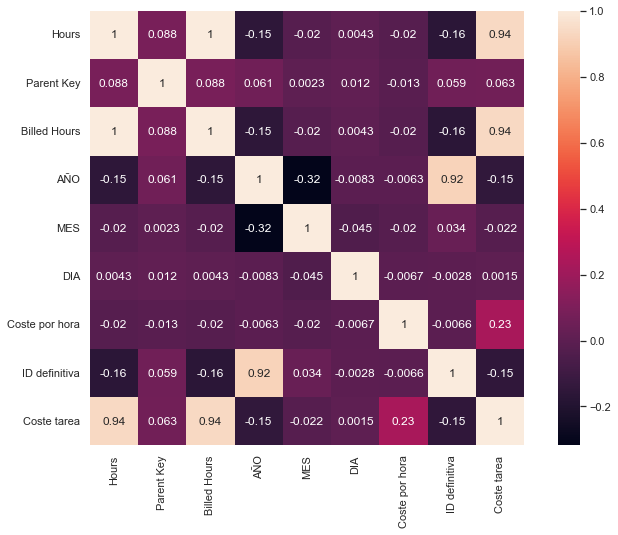

In [50]:
import seaborn as sns

sns.set()
sns.heatmap(train.corr(), square = True, annot = True)

Esta tabla muestra la correlación estadística existente entre las variables numéricas del set de datos.
El nivel de correlación de las variables con la objetivo es muy bajo, por lo que es necesario volver al paso anterior del proceso KDD y aplicar nuevas transformaciones que permitan llgar a un modelo de datos en el que las variables puedan explicarse unas a otras.
Para ello, se procede a reorganizar los datos, pero se va a llevar a cabo mediante Power BI, tras un proceso ETL.

Se continúa con la fase de minería en un nuevo archivo al que se importa un nuevo dataframe extraído de Power BI con las transformaciones pertinentes.